In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

In [28]:
df_energy = pd.read_csv('./data/prepared/df_energy_climate_2020.csv')

## Analysis on the energy price and energy feeding volume

### Overview of the key figures

In [29]:
df_energy[['nuclear_power', 'not_renewable', 'renewable', 'energy_price']].describe()

,nuclear_power,not_renewable,renewable,energy_price
count,8784.000000,8784.000000,8784.000000,8784.000000
mean,6934.673246,33765.069651,27962.757734,30.471738
std,969.007750,11153.160609,12083.398906,17.501777
min,3778.562500,12031.295000,7868.889000,-83.940000
25%,6449.072375,25596.779063,18187.097938,21.750000
50%,6793.803375,32783.599125,26601.655125,30.990000
75%,7833.245750,39941.688938,36812.760000,40.250000
max,8178.095500,68865.521000,68749.836250,200.040000


#### What does it mean when energy price reached minus?
Negative electricity prices (or very low electricity prices) occur in wholesale trading when there is a surplus of electricity. Or, in other words, when electricity generation exceeds electricity consumption. Such a situation arises, among other things, when there is a very high feed-in of very low-priced electricity from wind, as is the case at the moment.
<br />
[General information about energy price](https://www.enbw.com/energie-entdecken/energiewirtschaft-und-politik/energiewirtschaft/strommarkt.html)

### Correlation between the key figures 

In [30]:
df_energy.loc[:,['nuclear_power', 'not_renewable', 'renewable', 'energy_price']].corr()

,nuclear_power,not_renewable,renewable,energy_price
nuclear_power,1.000000,0.407899,-0.135583,0.373059
not_renewable,0.407899,1.000000,-0.460238,0.797350
renewable,-0.135583,-0.460238,1.000000,-0.513584
energy_price,0.373059,0.797350,-0.513584,1.000000


### Conclusion
- Renewable energy has a **negative** correlation to energy price
- Not renewable energy has a **strong** correlation to energy price

## Analysis - Day of week

In [31]:
df_energy['datetime'] = pd.to_datetime(df_energy['datetime'])
df_energy['dayofweek'] = df_energy['datetime'].dt.day_of_week
grp_day_of_week = df_energy.groupby(['dayofweek'])

### Overview of energy price grouped by day of week

In [32]:
grp_day_of_week['energy_price'].describe()

,count,mean,std,min,25%,50%,75%,max
dayofweek,,,,,,,,
0,1248.0,32.391106,18.985385,-78.15,22.6125,33.365,43.2925,200.04
1,1248.0,33.767548,18.157579,-83.94,24.2775,33.000,42.4600,189.25
2,1272.0,35.137555,16.003927,-29.98,25.5375,33.785,43.2300,114.00
3,1272.0,35.097586,14.362931,-1.58,25.7650,34.040,43.1850,110.13
4,1248.0,33.382268,13.444462,-8.77,24.9200,33.595,41.2525,106.35
5,1248.0,25.210457,12.842518,-11.16,17.1250,26.260,34.0000,58.00
6,1248.0,18.136963,20.081397,-74.97,7.5700,21.445,32.0100,58.97


(0: Monday - 6: Sunday)
<br/>
- Energy price on weekend are lower than on weekdays
- Mean and median are almost the same -> the prices are more or less evenly distributed from the lowest to highest price

### Visualize prices by day of week

<AxesSubplot: xlabel='dayofweek', ylabel='energy_price'>

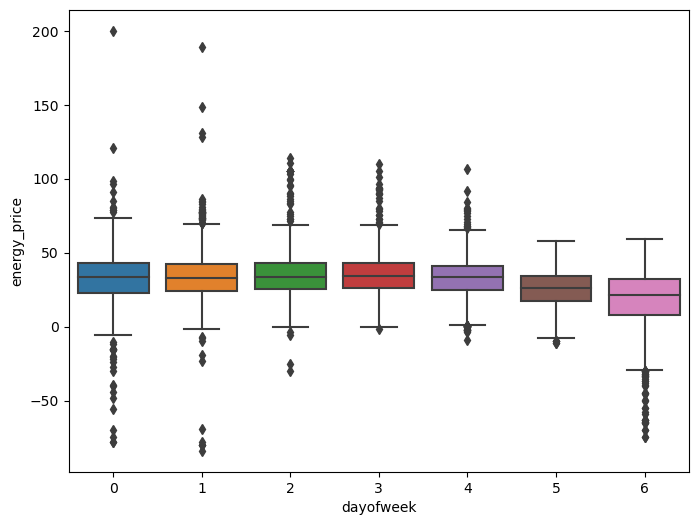

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x=df_energy['dayofweek'], 
    y=df_energy['energy_price'] 
    )

- Energy price tends to decrease on weekends.
<br />
[Article about the relation between energy cost and day of week](https://www.finanztip.de/stromtarife/variable-stromtarife/)

### Day of week and energy feeding volume
This analysis was done to find out the reason of lower energy prices on weekends.

In [34]:
df_energy['total_feeding_volume'] = df_energy['renewable'] + df_energy['nuclear_power'] + df_energy['not_renewable']

In [40]:
df_energy_reshape = df_energy.melt(['datetime', 'dayofweek', 'energy_price', 'date', 'hour', 'month', 'wind_speed', 'solar_radiation', 'temperature'], var_name='type_of_power', value_name='feeding_volume')

<AxesSubplot: xlabel='type_of_power', ylabel='feeding_volume'>

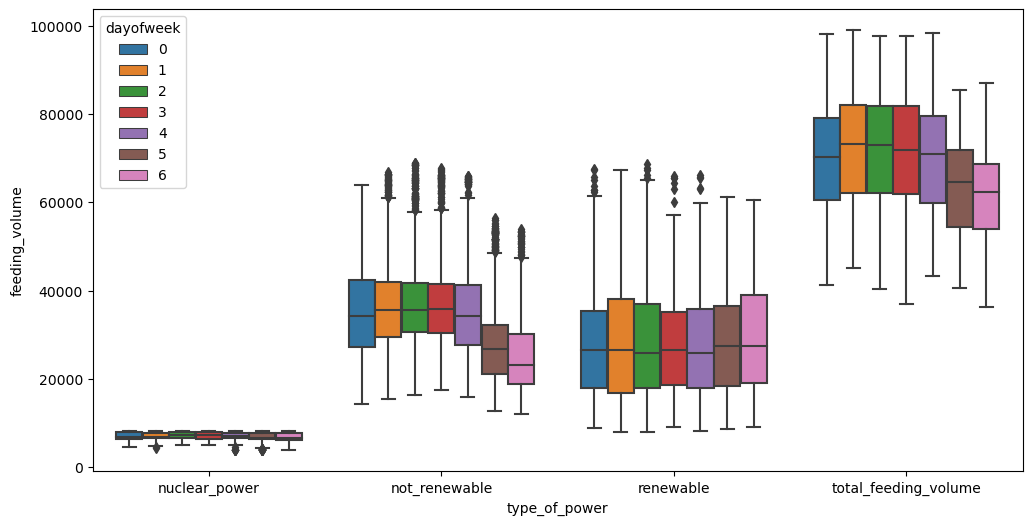

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_energy_reshape,
    x='type_of_power',
    y='feeding_volume',
    hue='dayofweek',
)

- No significant differences on feeding volume of nuclear power and renewable energy per day of week
- Feeding volume of not renewable energy is considerably less (by about 10.000 MW)

### Conclusion
- Energy price is lower on weekends as the dmand is less and thus the share of the renewable energy becomes bigger.

## Analysis - energy price and climate
### Correlation of energy price, energy feeding volume and climate

In [38]:
corr = df_energy[['nuclear_power', 'not_renewable', 'renewable', 'energy_price', 'wind_speed', 'solar_radiation', 'temperature']].corr()
corr

,nuclear_power,not_renewable,renewable,energy_price,wind_speed,solar_radiation,temperature
nuclear_power,1.000000,0.407899,-0.135583,0.373059,-0.050952,-0.254697,-0.319468
not_renewable,0.407899,1.000000,-0.460238,0.797350,-0.379269,-0.186633,-0.243570
renewable,-0.135583,-0.460238,1.000000,-0.513584,0.804260,0.478710,0.076419
energy_price,0.373059,0.797350,-0.513584,1.000000,-0.444114,-0.216114,-0.065411
wind_speed,-0.050952,-0.379269,0.804260,-0.444114,1.000000,0.096488,-0.109658
solar_radiation,-0.254697,-0.186633,0.478710,-0.216114,0.096488,1.000000,0.548614
temperature,-0.319468,-0.243570,0.076419,-0.065411,-0.109658,0.548614,1.000000


- wind speed and renewable energy have high correlation
- wind speed and energy price have negative correlation

### Correlation in heatmap

<AxesSubplot: >

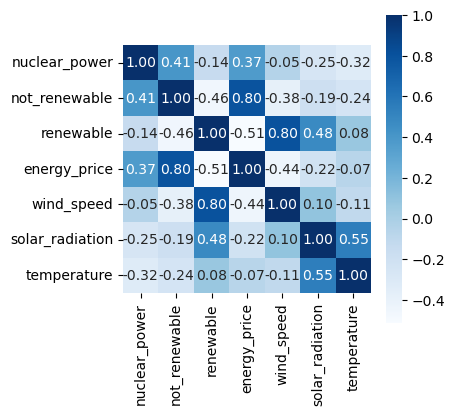

In [39]:
plt.figure(figsize=(4,4))
sns.heatmap(
    corr,
    square=True,
    cmap='Blues',
    annot=True,
    fmt='.2f'
)

### Conclusion

## Time series analysis
### Autocorrelation

In [64]:
plt.rcParams['figure.figsize'] = (10, 5)

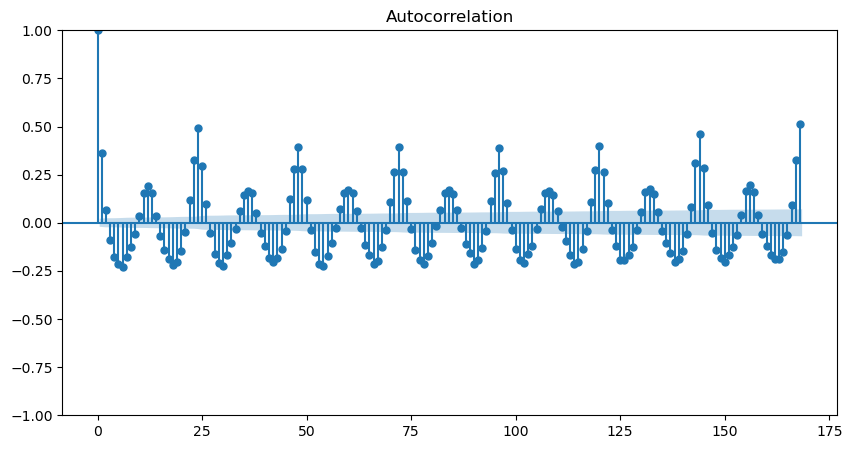

In [65]:
# behavior in 1 week
diff_week = plot_acf(df_energy["energy_price"].diff().dropna(), lags=168)

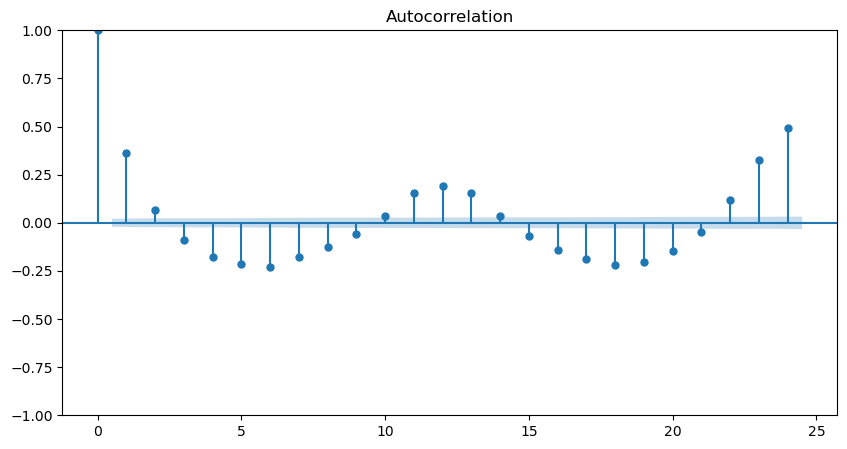

In [66]:
# behavior in 1 day
diff_day = plot_acf(df_energy["energy_price"].diff().dropna(), lags=24)

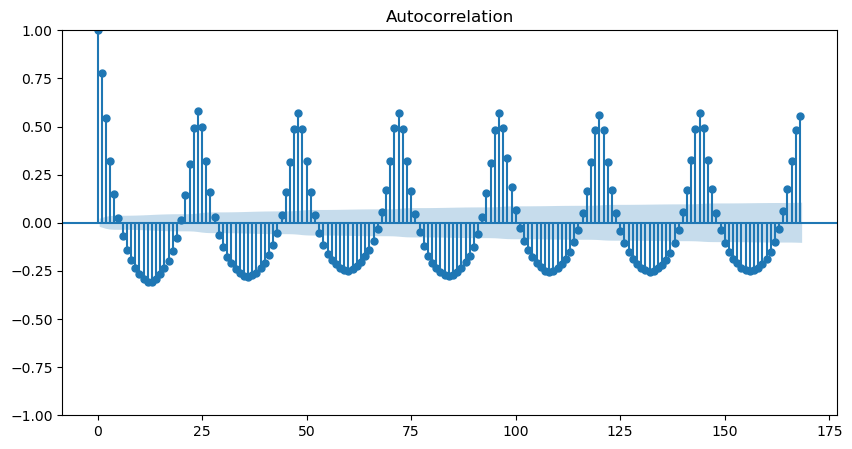

In [67]:
diff_week_wind = plot_acf(df_energy["wind_speed"].diff().dropna(), lags=168)

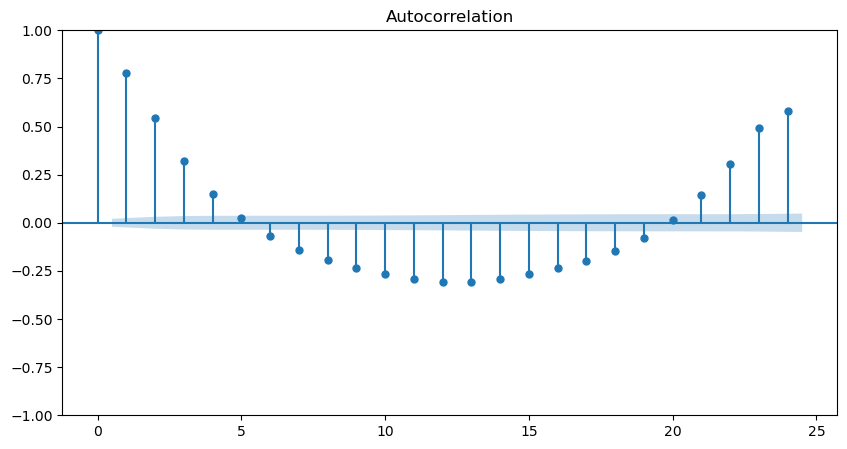

In [68]:
diff_day_wind = plot_acf(df_energy["wind_speed"].diff().dropna(), lags=24)

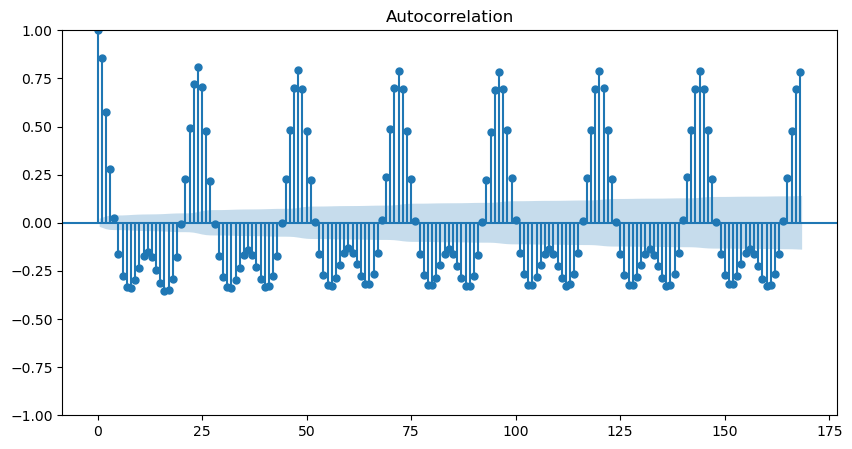

In [69]:
diff_week_renewable = plot_acf(df_energy["renewable"].diff().dropna(), lags=168)

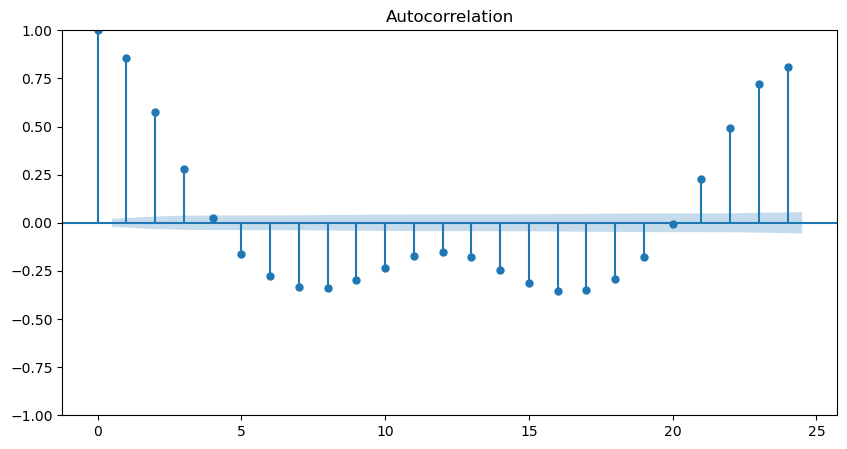

In [70]:
diff_day_renewable = plot_acf(df_energy["renewable"].diff().dropna(), lags=24)